# 14 Transformer Positional Encoding Layer in Keras

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import convert_to_tensor, string
from tensorflow.data import Dataset
from tensorflow.keras.layers import Embedding, Layer, TextVectorization

## 14.1 The Text Vectorization Layer

This layer maps the (standardized/cleaned; i.e. no punctuation/noise, all lowercase) words in the sentences to a dictionary and then in turn to numbers.
It needs the maximum vocabulary size and the required length of the output sequences as input.
We use the `adapt()` method to generate a vocabulary.

In [2]:
output_sequence_length = 5
vocab_size = 10

sentences = [["I am a robot"], ["you too robot"]]
sentence_data = Dataset.from_tensor_slices(sentences)

# Create the TextVectorization layer
vectorize_layer = TextVectorization(
    output_sequence_length=output_sequence_length, max_tokens=vocab_size
)

# Train the layer to create a dictionary
vectorize_layer.adapt(sentence_data)

# Convert all sentences to tensors
word_tensors = convert_to_tensor(sentences, dtype=tf.string)

# Use the word tensors to get vectorized phrases
vectorized_words = vectorize_layer(word_tensors)
print("Vocabulary: ", vectorize_layer.get_vocabulary())
print("Vectorized words: ", vectorized_words)

Vocabulary:  ['', '[UNK]', 'robot', 'you', 'too', 'i', 'am', 'a']
Vectorized words:  tf.Tensor(
[[5 6 7 2 0]
 [3 4 2 0 0]], shape=(2, 5), dtype=int64)


2023-08-24 15:14:41.671618: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


## 14.2 The Embedding Layer

### The Word Embeddings

This layer maps the dictionary indices above to vectors. The vectors can be initially random numbers that are later tuned (learned) or they can be some predefined weights (i.e. reused pre-learned embeddings) which we will see later.
This layer needs the maximum integer index value to be vectorized, as well as the desired embedding dimension length.

In [3]:
emb_length = 6

word_embedding_layer = Embedding(vocab_size, emb_length)
embedded_words = word_embedding_layer(vectorized_words)
print(embedded_words)

tf.Tensor(
[[[-1.6172901e-03 -2.4350310e-02 -4.6926808e-02 -7.1148761e-03
   -4.5362223e-02 -3.5543442e-02]
  [-3.0565476e-02  3.7173677e-02  7.8274980e-03  3.8616408e-02
   -1.3937555e-02 -2.8582061e-02]
  [-2.7113020e-02  3.9754402e-02 -3.9876055e-02  1.1395015e-02
   -4.8934221e-02 -3.7800558e-03]
  [ 4.0603865e-02 -4.3334246e-02  2.0527769e-02  2.6370276e-02
    3.5733748e-02 -7.7047236e-03]
  [-1.1006817e-03  1.8714443e-03  1.5535843e-02 -4.4862092e-02
   -1.5159547e-02 -3.3811815e-03]]

 [[-3.4514815e-04 -1.9406820e-02  2.1527711e-02 -4.2986125e-05
    2.5717769e-02  1.8475320e-02]
  [ 2.3730431e-02 -1.3247229e-02  3.6245797e-02  4.2147551e-02
   -2.9149616e-02  8.7076426e-04]
  [ 4.0603865e-02 -4.3334246e-02  2.0527769e-02  2.6370276e-02
    3.5733748e-02 -7.7047236e-03]
  [-1.1006817e-03  1.8714443e-03  1.5535843e-02 -4.4862092e-02
   -1.5159547e-02 -3.3811815e-03]
  [-1.1006817e-03  1.8714443e-03  1.5535843e-02 -4.4862092e-02
   -1.5159547e-02 -3.3811815e-03]]], shape=(2, 5, 6

### The Position Embeddings

Same idea as the word embeddings, only we are encoding the absolute, fixed positions (0, 1, 2, ...) to [initially] random vectors.

In [4]:
position_embedding_layer = Embedding(output_sequence_length, emb_length)
position_indices = tf.range(output_sequence_length)
embedded_indices = position_embedding_layer(position_indices)
print(embedded_indices)

tf.Tensor(
[[ 0.02700363  0.01012101 -0.00686147  0.01409799  0.03555569  0.03502781]
 [-0.02419301 -0.04798692  0.04023731 -0.02084768 -0.04355747 -0.02992003]
 [ 0.0426485   0.04733178  0.0176563  -0.04847328  0.04112876 -0.03960421]
 [ 0.0338738   0.01279635  0.02278342  0.04233417 -0.00170843 -0.01491459]
 [-0.04387764 -0.03644484 -0.02744275 -0.01016261  0.02881945 -0.02301252]], shape=(5, 6), dtype=float32)


### The Output of the Positional Encoding Layer in Transformers

In transformers, we add up the position encodings and word encodings (AKA embeddings), so we need to make sure they are of the same size (`emb_length` here).

In [5]:
final_output_embedding = embedded_words + embedded_indices
print("Final output: ", final_output_embedding)

Final output:  tf.Tensor(
[[[ 0.02538634 -0.0142293  -0.05378828  0.00698312 -0.00980653
   -0.00051564]
  [-0.05475849 -0.01081325  0.04806481  0.01776873 -0.05749502
   -0.05850209]
  [ 0.01553548  0.08708619 -0.02221975 -0.03707826 -0.00780546
   -0.04338427]
  [ 0.07447767 -0.03053789  0.04331119  0.06870444  0.03402532
   -0.02261932]
  [-0.04497832 -0.0345734  -0.01190691 -0.05502471  0.01365991
   -0.0263937 ]]

 [[ 0.02665849 -0.00928581  0.01466624  0.01405501  0.06127346
    0.05350313]
  [-0.00046258 -0.06123415  0.07648311  0.02129987 -0.07270708
   -0.02904927]
  [ 0.08325236  0.00399754  0.03818407 -0.022103    0.07686251
   -0.04730893]
  [ 0.03277312  0.0146678   0.03831927 -0.00252793 -0.01686797
   -0.01829578]
  [-0.04497832 -0.0345734  -0.01190691 -0.05502471  0.01365991
   -0.0263937 ]]], shape=(2, 5, 6), dtype=float32)


## 14.3 Subclassing the Keras Embedding Layer

Now let's do the same thing by subclassing `Layer` in Keras, taking advantage of all the functionality it provides for free.

In [6]:
class CustomEmbedding(Layer):
    def __init__(self, seq_length, vocab_size, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.word_embedding_layer = Embedding(
            input_dim=vocab_size, output_dim=output_dim
        )
        self.position_embedding_layer = Embedding(
            input_dim=seq_length, output_dim=output_dim
        )

    def call(self, inputs):
        position_indices = tf.range(tf.shape(inputs)[-1])
        embedded_words = self.word_embedding_layer(inputs)
        embedded_indices = self.position_embedding_layer(position_indices)
        return embedded_words + embedded_indices

In [7]:
my_embedding_layer = CustomEmbedding(
    output_sequence_length, vocab_size, emb_length
)
embedded_layer_output = my_embedding_layer(vectorized_words)
print(f"{embedded_layer_output = }")

embedded_layer_output = <tf.Tensor: shape=(2, 5, 6), dtype=float32, numpy=
array([[[-0.02279533, -0.03684264,  0.04430204, -0.07646132,
         -0.00119046, -0.06025952],
        [-0.0100867 ,  0.04146884, -0.0245834 ,  0.01881371,
          0.03050403, -0.02851375],
        [-0.01885891,  0.04807749,  0.02824143, -0.08227142,
          0.03522062,  0.08295616],
        [ 0.04761335,  0.08168048,  0.0052874 , -0.03307953,
         -0.02813214,  0.0412189 ],
        [ 0.06891372, -0.03475349, -0.01550976, -0.06817614,
          0.0410574 , -0.0044678 ]],

       [[ 0.02743136, -0.06091241, -0.01962829, -0.00652026,
         -0.04578836,  0.01342759],
        [-0.04636434,  0.05684753,  0.01269663,  0.08176479,
          0.03272022, -0.08121005],
        [-0.01870813,  0.06443319, -0.03734771, -0.05276624,
          0.00883741,  0.04390946],
        [ 0.0653016 ,  0.03595394,  0.08108145, -0.04639937,
          0.04242576, -0.00776982],
        [ 0.06891372, -0.03475349, -0.01550976, -0

But these are randomly-initialized, learnable embeddings for both positions and word vectors. But as we saw in chapter 13, the AIAYN authors have devised a smart *fixed* positional encoding scheme. Let's implement that next.

## 14.4 Positional Encoding in Transformers

Recall from chapter 13:
$$\begin{eqnarray}
P(k, 2i) &=& \sin\Big(\frac{k}{n^{2i/d}}\Big)\\
P(k, 2i+1) &=& \cos\Big(\frac{k}{n^{2i/d}}\Big)
\end{eqnarray}$$

We will specify our own embedding metrix (as above) by providing the positional encoding matrix as *untrainable* weights.

In [8]:
class CustomEmbeddingWithFixedPosnWts(Layer):
    def __init__(self, sequence_length, vocab_size, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.word_embedding_layer = Embedding(
            input_dim=vocab_size, output_dim=output_dim
        )
        posn_embedding_matrix = self.get_position_encoding(
            sequence_length, output_dim
        )
        self.posn_embedding_layer = Embedding(
            input_dim=sequence_length,
            output_dim=output_dim,
            weights=[posn_embedding_matrix],
            trainable=False,
        )

    def get_position_encoding(self, seq_len, d, n=10000):
        pos_enc = np.zeros((seq_len, d))
        for k in range(seq_len):
            for i in np.arange(int(d / 2)):
                denominator = np.power(n, 2 * i / d)
                pos_enc[k, 2 * i] = np.sin(k / denominator)
                pos_enc[k, 2 * i + 1] = np.cos(k / denominator)
        return pos_enc

    def call(self, inputs):
        position_indices = tf.range(tf.shape(inputs)[-1])
        embedded_words = self.word_embedding_layer(inputs)
        embedded_indices = self.posn_embedding_layer(position_indices)
        return embedded_words + embedded_indices

In [9]:
aiayn_embedding = CustomEmbeddingWithFixedPosnWts(
    output_sequence_length, vocab_size, emb_length
)
aiayn_output = aiayn_embedding(vectorized_words)
print("Output from my_embedded_layer: ", aiayn_output)

Output from my_embedded_layer:  tf.Tensor(
[[[ 3.31636332e-02  9.92607176e-01  2.71414854e-02  9.70949650e-01
    4.40645851e-02  1.03555584e+00]
  [ 8.88178825e-01  5.86727679e-01  2.70452257e-02  1.00416362e+00
   -2.43913438e-02  9.98290122e-01]
  [ 9.38048601e-01 -4.27272022e-01  7.15769008e-02  9.67539191e-01
   -2.67147906e-02  9.72147942e-01]
  [ 1.66453391e-01 -1.03936064e+00  1.06697366e-01  1.02793086e+00
    3.66285779e-02  1.02373052e+00]
  [-7.83484399e-01 -6.55974329e-01  1.49076849e-01  9.49928880e-01
   -3.62296551e-02  9.84357834e-01]]

 [[ 1.20447874e-02  9.77019250e-01  1.91534422e-02  1.00716507e+00
   -4.33196314e-02  1.03809226e+00]
  [ 8.27982306e-01  5.77738285e-01 -3.77953053e-04  9.67958093e-01
    1.77733563e-02  1.04008496e+00]
  [ 9.34630811e-01 -4.65514958e-01  6.05977625e-02  1.03330445e+00
    3.44741754e-02  1.02374208e+00]
  [ 1.14438102e-01 -9.92323220e-01  1.03276223e-01  9.57435608e-01
   -3.83840278e-02  9.84374106e-01]
  [-7.83484399e-01 -6.559743

## 14.5 Visualizing the Final Embedding

Let us now take some longer sentences, embed them using each method and visualize the results.

In [10]:
technical_phrase = (
    "to understand machine learning algorithms you need to understand concepts"
    " such as gradient of a function hessians of a matrix and optimization etc"
)
wise_phrase = (
    "patrick henry said give me liberty or give me death when he addressed the"
    " second virginia convention in march"
)

total_vocab_size = 200
seq_length = 20
emb_length = 50

phrase_vectorization_layer = TextVectorization(
    output_sequence_length=seq_length, max_tokens=total_vocab_size
)

# Learn the dictionary
phrase_vectorization_layer.adapt([technical_phrase, wise_phrase])

# Convert all sentences to tensors
phrase_tensors = convert_to_tensor(
    [technical_phrase, wise_phrase], dtype=tf.string
)

# Use the word tensors to get vectorized phrases
vectorized_phrases = phrase_vectorization_layer(phrase_tensors)

random_posn_weights_embedding_layer = CustomEmbedding(
    seq_length, total_vocab_size, emb_length
)
fixed_posn_weights_embedding_layer = CustomEmbeddingWithFixedPosnWts(
    seq_length, total_vocab_size, emb_length
)

random_posn_embedding = random_posn_weights_embedding_layer(vectorized_phrases)
fixed_posn_embedding = fixed_posn_weights_embedding_layer(vectorized_phrases)

Let's see what the embeddings look like with random positional encoding:

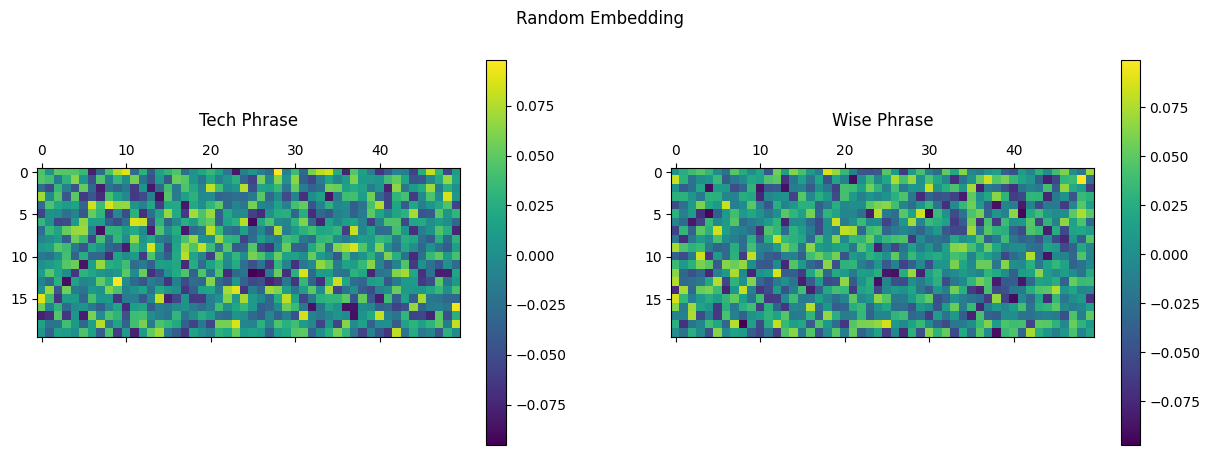

In [11]:
fig = plt.figure(figsize=(15, 5))
title = ["Tech Phrase", "Wise Phrase"]
for i in range(2):
    ax = plt.subplot(1, 2, 1 + i)
    matrix = tf.reshape(random_posn_embedding[i, :, :], (seq_length, emb_length))
    cax = ax.matshow(matrix)
    plt.gcf().colorbar(cax)
    plt.title(title[i], y=1.2)
fig.suptitle("Random Embedding")
plt.show()

Pretty, well, random, as expected! Now let's visualize the embeddings with fixed positional encodings à la the AIAYN paper:

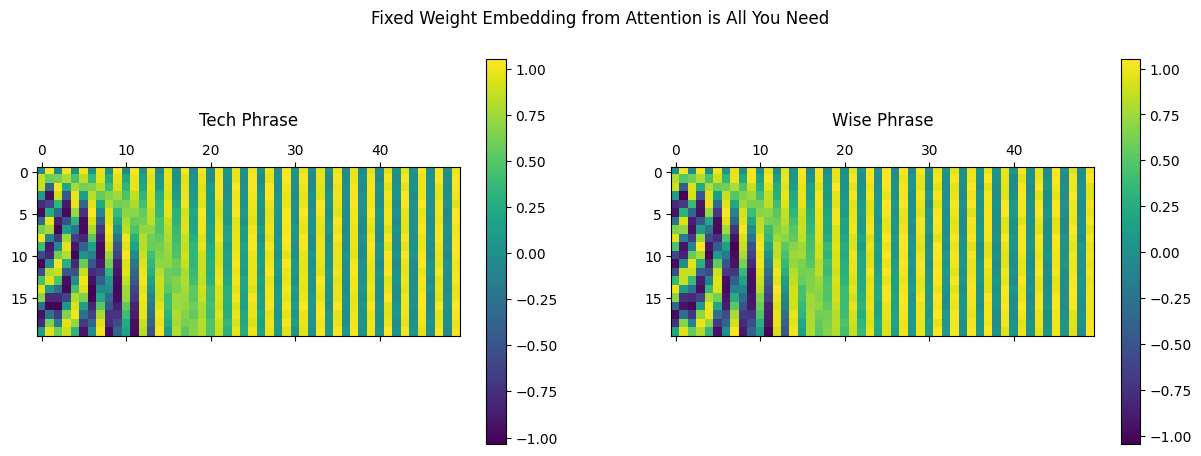

In [12]:
fig = plt.figure(figsize=(15, 5))
title = ["Tech Phrase", "Wise Phrase"]
for i in range(2):
    ax = plt.subplot(1, 2, 1 + i)
    matrix = tf.reshape(
        fixed_posn_embedding[i, :, :], (seq_length, emb_length)
    )
    cax = ax.matshow(matrix)
    plt.gcf().colorbar(cax)
    plt.title(title[i], y=1.2)
fig.suptitle("Fixed Weight Embedding from Attention is All You Need")
plt.show()

**Note:** Due to the way Keras's `Embedding` layer randomly initializes our word embedding weights (i.e. _very_ close to zero), their effect on the positional encodings (which vary from -1 to 1) is extremely muted and the two phrases' total embeddings look identical at first glance. But they are indeed different.